In [1]:
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw
import scipy.sparse as sparse

from tqdm import trange, tqdm

from collections import defaultdict, Counter
from itertools import combinations

from load_graph import *

In [2]:
def plot_overlap_densities(graphs, LARGE, titles):
    data = []
    for (g, coms), title in zip(graphs, titles):
        print(title)
        large_overlaps = set()
        for i in trange(len(coms)):
            for j in range(i):
                if len(coms[i].intersection(coms[j])) >= LARGE:
                    large_overlaps.add((i,j))

        for k, (i,j) in tqdm(enumerate(large_overlaps), total=len(large_overlaps)):
            if len(coms[i]) < len(coms[j]):
                small_com = coms[i]
                large_com = coms[j]
            else:
                small_com = coms[j]
                large_com = coms[i]
            intersection = small_com.intersection(large_com)
            for c, name in zip([intersection, small_com, large_com], ["Intersection", "Small", "Large"]):
                sg = g.subgraph(c)
                density = 2*sg.ecount() / (sg.vcount()*(sg.vcount())-1)
                data.append([title, name, density])


    df = pd.DataFrame(data, columns=['Graph', 'Set', 'Density'])
    fig, ax = plt.subplots()
    sns.boxplot(x="Graph", y="Density",
            hue="Set", palette="crest",
            data=df,
            whis=(0, 100),
            ax=ax
            )
    sns.despine(offset=10, trim=True)
    #plt.ylim((0, 0.2))
    plt.title(f"{titles[0]}-Like Overlap Densities", fontsize=16)
    plt.xlabel("Graph", fontsize=15)
    plt.ylabel("Density", fontsize=15)
    ax.tick_params(labelsize=12)
    fig.set_dpi(140)
    #fig.set_size_inches(10, 5)
    plt.tight_layout()
    plt.show()

DBLP


100%|██████████| 20927/20927 [00:44<00:00, 466.64it/s]


d=2


100%|██████████| 7071/7071 [00:13<00:00, 514.43it/s]


d=5


100%|██████████| 5738/5738 [00:12<00:00, 455.80it/s]


d=10


100%|██████████| 7219/7219 [00:21<00:00, 334.23it/s]


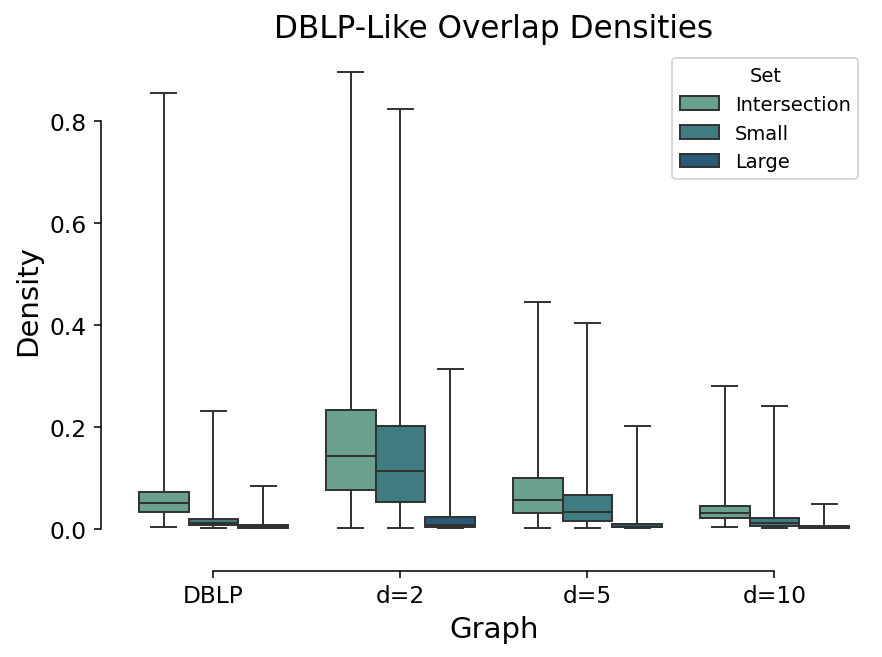

In [3]:
# variable stores the tuple (graph, coms)
real = load_snap("data/com-dblp.ungraph.txt", "data/com-dblp.all.cmty.txt")
abcdoo_d2 = load_abcdoo("data/abcdoo_dblp_d2_edge.dat", "data/abcdoo_dblp_d2_com.dat")
abcdoo_d5 = load_abcdoo("data/abcdoo_dblp_d5_edge.dat",  "data/abcdoo_dblp_d5_com.dat")
abcdoo_d10 = load_abcdoo("data/abcdoo_dblp_d10_edge.dat", "data/abcdoo_dblp_d10_com.dat")

plot_overlap_densities(
    [
        real,
        abcdoo_d2,
        abcdoo_d5,
        abcdoo_d10,
        ],
    25,
    [
        "DBLP",
        "d=2",
        "d=5",
        "d=10",
        ]
)

Youtube


100%|██████████| 1207/1207 [00:00<00:00, 2923.65it/s]


d=2


100%|██████████| 951/951 [00:00<00:00, 1819.48it/s]


d=5


100%|██████████| 621/621 [00:00<00:00, 1102.42it/s]


d=10


100%|██████████| 571/571 [00:00<00:00, 658.33it/s]


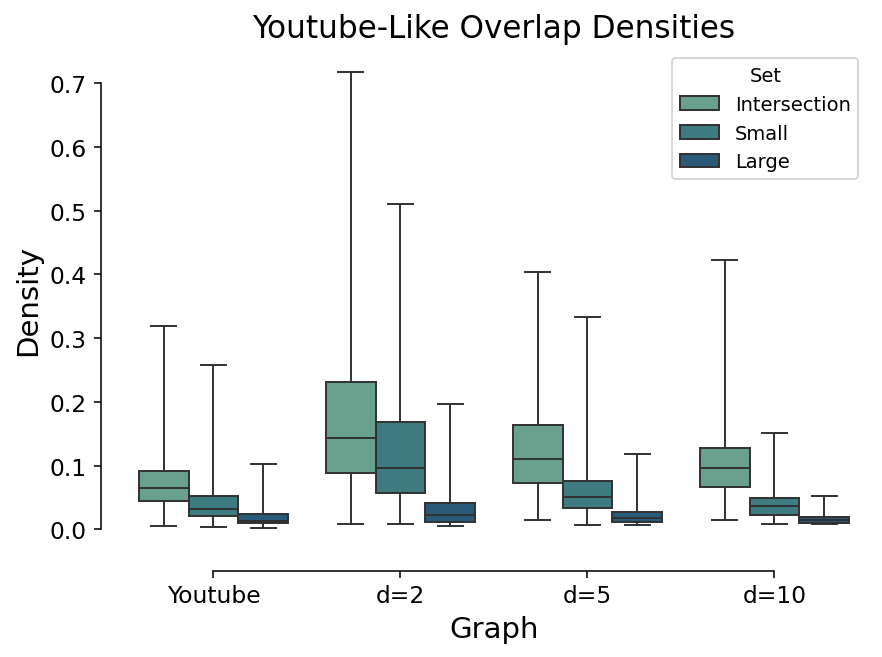

In [4]:
# variable stores the tuple (graph, coms)
real = load_snap("data/com-youtube.ungraph.txt", "data/com-youtube.all.cmty.txt", drop_outliers=True)
abcdoo_d2 = load_abcdoo("data/abcdoo_youtube_d2_edge.dat", "data/abcdoo_youtube_d2_com.dat", has_outliers=False)
abcdoo_d5 = load_abcdoo("data/abcdoo_youtube_d5_edge.dat",  "data/abcdoo_youtube_d5_com.dat", has_outliers=False)
abcdoo_d10 = load_abcdoo("data/abcdoo_youtube_d10_edge.dat", "data/abcdoo_youtube_d10_com.dat", has_outliers=False)

plot_overlap_densities(
    [
        real,
        abcdoo_d2,
        abcdoo_d5,
        abcdoo_d10,
        ],
    25,
    [
        "Youtube",
        "d=2",
        "d=5",
        "d=10",
        ]
)

Amazon


100%|██████████| 45679/45679 [03:17<00:00, 230.78it/s]


d=2


100%|██████████| 68389/68389 [03:57<00:00, 287.80it/s]


d=5


100%|██████████| 53780/53780 [03:27<00:00, 259.81it/s]


d=10


100%|██████████| 55365/55365 [04:09<00:00, 222.27it/s]


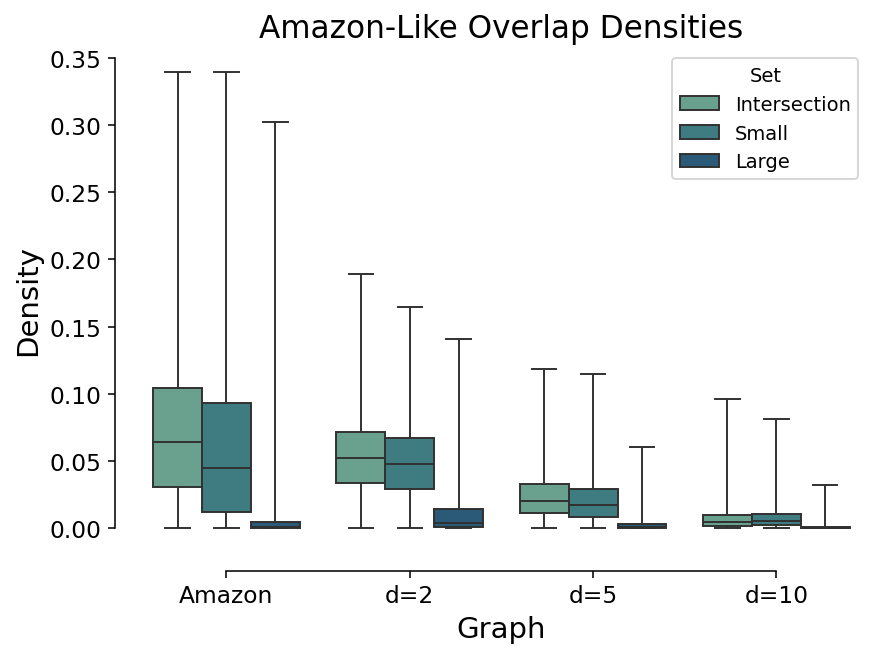

In [5]:
# variable stores the tuple (graph, coms)
real = load_snap("data/com-amazon.ungraph.txt", "data/com-amazon.all.dedup.cmty.txt")
abcdoo_d2 = load_abcdoo("data/abcdoo_amazon_d2_edge.dat", "data/abcdoo_amazon_d2_com.dat")
abcdoo_d5 = load_abcdoo("data/abcdoo_amazon_d5_edge.dat",  "data/abcdoo_amazon_d5_com.dat")
abcdoo_d10 = load_abcdoo("data/abcdoo_amazon_d10_edge.dat", "data/abcdoo_amazon_d10_com.dat")

plot_overlap_densities(
    [
        real,
        abcdoo_d2,
        abcdoo_d5,
        abcdoo_d10,
        ],
    25,
    [
        "Amazon",
        "d=2",
        "d=5",
        "d=10",
        ]
)